# Medical Appointment No Shows - Who's To Blame?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion and limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset includes medical appointment status as well as some patient details of Brazilian families; I'd be interested in investigating the reason why some patients do not show up to their scheduled appointments and whether there are opportunities for improvement in appointment administration that would result in a higher attendance frequency.

The dataset consists of 14 variables as follows:

1. PatientId : Unique identification of a patient
2. AppointmentID : Unique identification of each appointment
3. Gender: Male or Female.
4. ScheduledDay: The day of registering the appointment.
5. AppointmentDay: The day of actual appointment.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: Whether the patient is enrolled in [Bolsa_Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), which is a social welfare program of the Government of Brazil
9. Hipertension: Hypertension, also known as high blood pressure. Part of patient's medical history.
10. Diabetes: Part of patient's medical history.
11. Alcoholism: drinking of alcohol that results in significant mental or physical health problems. Part of patient's medical history.
12. Handcap: handicap, part of patient's medical history.
13. SMS_received: frequent reminders of scheduled appointment.
14. No-show: whether the patient made the actual appointment or not. 'Yes/True' means the patient did not make the appointment.

Several questions will be addressed:

1. Factors driving higher attendance frequency? is it age, gender, medical history or enrollment in Bolsa Família program?

2. Does time has an impact on attendance frequency?

3. Are there certain neighborhoods experiencing higher attendance frequency than others? Why?

4. Is appointment scheduling administered properly?
	
Main dependent variable is appointment status 'No-Show’; rest will be the independent ones.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from functools import reduce

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# load data
master_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# inspect
master_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
master_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Inspect unusual age records that are < 0

master_df[master_df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
# Inspect unusual Handcap records that are > 1

master_df[master_df.Handcap > 1].sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6067,7.543387e+12,5705981,F,2016-05-17T07:41:55Z,2016-05-19T00:00:00Z,10,RESISTÊNCIA,0,0,0,0,2,0,Yes
76851,7.152584e+12,5704178,F,2016-05-16T15:13:07Z,2016-05-17T00:00:00Z,15,SÃO PEDRO,0,0,0,0,2,0,Yes
82774,9.825542e+14,5658453,M,2016-05-04T11:10:53Z,2016-05-06T00:00:00Z,33,NOVA PALESTINA,0,0,0,0,2,0,No


In [8]:
# Check for duplicate records

master_df.duplicated().sum()

0

In [9]:
# Check whether each patient has multiple records

master_df.PatientId.nunique(), master_df.AppointmentID.nunique()

(62299, 110527)

In [10]:
# Inspect multiple records of single patient

master_df[master_df.PatientId.duplicated(keep=False)].sort_values(by='PatientId')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58616,2.263866e+07,5580835,F,2016-04-14T07:23:30Z,2016-05-03T00:00:00Z,22,INHANGUETÁ,0,0,0,0,0,1,No
88585,2.263866e+07,5715081,F,2016-05-18T13:37:12Z,2016-06-08T00:00:00Z,23,INHANGUETÁ,0,0,0,0,0,1,No
83628,5.216894e+07,5704816,F,2016-05-16T16:42:19Z,2016-05-16T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
49826,5.216894e+07,5607220,F,2016-04-20T11:22:15Z,2016-05-17T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
11009,6.485121e+07,5683383,F,2016-05-11T07:28:23Z,2016-05-13T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32033,9.999320e+14,5736368,M,2016-05-25T08:14:58Z,2016-05-25T00:00:00Z,90,JABOUR,0,0,0,0,0,0,No
32023,9.999320e+14,5710157,M,2016-05-17T15:22:01Z,2016-05-17T00:00:00Z,90,JABOUR,0,0,0,0,0,0,No
62194,9.999320e+14,5616762,M,2016-04-25T14:46:41Z,2016-05-04T00:00:00Z,90,JABOUR,0,0,0,0,0,1,No
104616,9.999320e+14,5772701,M,2016-06-03T16:04:03Z,2016-06-07T00:00:00Z,90,JABOUR,0,0,0,0,0,1,No


### Data Cleaning

- Convert ID columns to string, no arithmetic operations will be performed on them
- Convert Scheduled and Appointment columns to date time, then calculate elapsed time from scheduling day till appointment day
- Convert No-show to 0 and 1 for convenience
- Make all header lower case and rename columns for better representation
- Drop records with age < 0, assuming that 0 represent new born
- Adjust Handcap values that are > 1 to be 1, assuming that these are just typos
- Unify age variable of patients with multiple records

In [11]:
# Make copy of master df

master_df_clean = master_df.copy()

In [12]:
# Convert ID columns to string, no arithmetic operations will be performed on them

master_df_clean.PatientId, master_df_clean.AppointmentID = master_df_clean.PatientId.astype(str), \
master_df_clean.AppointmentID.astype(str)

In [13]:
# Convert Scheduled and Appointment columns to date time

master_df_clean.ScheduledDay, master_df_clean.AppointmentDay = pd.to_datetime(master_df_clean.ScheduledDay).dt.tz_localize(None), \
pd.to_datetime(master_df_clean.AppointmentDay).dt.tz_localize(None)

# calculate elapsed time from scheduling day till actual appointment day
master_df_clean['elapsed_days'] = (master_df_clean.AppointmentDay - master_df_clean.ScheduledDay).dt.days

# inspect
master_df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,elapsed_days
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [14]:
# drop elapsed days below 0 as they are probably erroneous

master_df_clean = master_df_clean[~master_df_clean.elapsed_days < 0].copy()

master_df_clean.reset_index(drop= True, inplace = True)

In [15]:
# convert No-show to 0 and 1 for convenience

master_df_clean['No-show'].replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)

In [16]:
# Make all header lower case and rename columns for better representation

master_df_clean.columns = master_df_clean.columns.str.lower()

master_df_clean.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 
                                'scheduledday': 'scheduling_day', 'appointmentday': 'appointment_day', 
                                'scholarship':'enrolled_in_Bolsa_Família', 'hipertension': 'hypertension', 
                                'handcap':'handicap', 'no-show':'no_show'}, inplace=True)

In [17]:
# Drop records with age < 0

master_df_clean = master_df_clean[master_df_clean.age >= 0]

master_df_clean.reset_index(drop= True, inplace = True)

In [18]:
# Adjust Handicap values that are > 1 to be 1

master_df_clean.loc[master_df_clean.handicap > 1 , 'handicap'] = 1

In [19]:
# Unify age variable of patients with multiple records, I'll use the first recorded age as lead.  
# this will be done through creating a temp sorted dataframe for duplicate patient ids,
# identify gaps in recorded ages for single patient record,
# filter on each unique id then create a dict with IDs being keys and first recorded age as values
# finally map dict keys to main dataframe patient IDs

duplicate_id = master_df_clean[master_df_clean.patient_id.duplicated(keep=False)].sort_values(by='patient_id')

duplicate_id['first'] = duplicate_id['age']

duplicate_id['last'] = duplicate_id['age'].shift(-1)

duplicate_id['gap'] = duplicate_id['age'].shift(-1) - duplicate_id['age']

duplicate_id_fltrd = duplicate_id[(duplicate_id.first != duplicate_id.last) & (duplicate_id.gap == 1)]

duplicate_id_dict = duplicate_id_fltrd.set_index('patient_id').to_dict()['age']

master_df_clean.loc[master_df_clean.patient_id.isin(duplicate_id_fltrd.patient_id), 'age'] = \
master_df_clean.patient_id.map(duplicate_id_dict)

# inspect

master_df_clean[master_df_clean.patient_id.isin(duplicate_id_fltrd.patient_id)].sort_values(by='patient_id', ascending=False)

,patient_id,appointment_id,gender,scheduling_day,appointment_day,age,neighbourhood,enrolled_in_Bolsa_Família,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,elapsed_days
35239,999479168794227.0,5732030,M,2016-05-24 10:53:01,2016-05-30,44.0,RESISTÊNCIA,0,0,0,0,0,1,1,5
35236,999479168794227.0,5615134,M,2016-04-25 11:42:54,2016-05-02,44.0,RESISTÊNCIA,0,0,0,0,0,1,1,6
52295,999479168794227.0,5615162,M,2016-04-25 11:46:13,2016-05-09,44.0,RESISTÊNCIA,0,0,0,0,0,0,0,13
50306,99821629648.0,5659933,F,2016-05-04 15:06:51,2016-05-06,19.0,BELA VISTA,0,0,0,0,0,0,1,1
50307,99821629648.0,5659968,F,2016-05-04 15:11:26,2016-05-13,19.0,BELA VISTA,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70821,11163631268489.0,5719053,M,2016-05-19 10:30:51,2016-06-07,35.0,SANTA MARTHA,0,0,0,0,0,1,0,18
70636,11163631268489.0,5719037,M,2016-05-19 10:29:51,2016-06-02,35.0,SANTA MARTHA,0,0,0,0,0,1,1,13
6105,11163631268489.0,5690657,M,2016-05-12 10:26:33,2016-05-19,35.0,SANTA MARTHA,0,0,0,0,0,0,0,6
6152,11163631268489.0,5665675,M,2016-05-05 15:03:25,2016-05-06,35.0,SANTA MARTHA,0,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Factors driving higher attendance frequency? is it age, gender, medical history or enrollment in Bolsa Família program?

In [20]:
# Grouping multiple records of unique patients into single records and computing average, min, max of some appointment details
# this is to avoid double counting of same patient records while analysing independent variables 
# and also to provide better representation of appointment details to facilitate comparability

# First, group records and make calculations
unique_no_show_df = master_df_clean.groupby('patient_id')[['no_show']].agg(['count', 'mean'])

unique_no_show_df.columns = unique_no_show_df.columns.droplevel()

unique_elapsed_days_df = master_df_clean.groupby('patient_id')[['elapsed_days']].agg(['mean', 'max', 'min'])

unique_elapsed_days_df.columns = unique_elapsed_days_df.columns.droplevel()

unique_sms_received_df = master_df_clean.groupby('patient_id')[['sms_received']].agg(['mean'])

unique_sms_received_df.columns = unique_sms_received_df.columns.droplevel()

dfs = [unique_no_show_df, unique_elapsed_days_df, unique_sms_received_df]

grouped_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs) \
.rename(columns = {'count':'appointment_count', 'mean_x': 'no_show_mean', 'mean_y': 'elapsed_days_mean', 
                   'max':'elapsed_days_max', 'min':'elapsed_days_min', 'mean':'sms_received_mean'})

master_df_clean.index = master_df_clean.patient_id

# Then merge to obtain other variables, 
# keep first occuence only as these variables are supposed to be fixed for a single patient

grouped_df = pd.merge(grouped_df, master_df_clean.drop_duplicates(subset=['patient_id'], keep='first'), 
                      left_index=True, right_index=True, how='left')

master_df_clean.reset_index(drop=True, inplace=True)

grouped_df.reset_index(drop=True, inplace=True)

columns_list = grouped_df.columns.tolist()

columns_sort = columns_list[6:18]+columns_list[0:6]

grouped_df = grouped_df[columns_sort]

In [21]:
# duplicate intervals to bypass 'include_lowest' bug as suggested --> (https://github.com/pandas-dev/pandas/issues/23164)
# age groups categorization follows this link,
# https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-grandes-grupos-de-idade.html
# I split the age group of 15-64 into two groups for better representation

bins = pd.IntervalIndex.from_tuples([(-0.001,0), (0, 14), (14.999,15), (15, 24), (24.999,25), (25, 64), (64.999,65), 
                                     (65,122)])
labels = ['Children','Children','Youth', 'Youth', 'Adults','Adults','Seniors','Seniors']

grouped_df['age_group'] = pd.cut(grouped_df.age, bins, include_lowest =True).map(dict(zip(bins, labels)))

In [22]:
# calculate attendance frequency per each age group as a percentage of total group

age_groups = grouped_df.age_group.value_counts()

low_atnd_freq = grouped_df[grouped_df.no_show_mean > 0].age_group.value_counts()

hgh_atnd_freq = grouped_df[grouped_df.no_show_mean == 0].age_group.value_counts()

out_low = low_atnd_freq / age_groups

out_low.sort_values(ascending=False)

Youth       0.460925
Children    0.388912
Adults      0.356920
Seniors     0.263654
Name: age_group, dtype: float64

In [23]:
out_hgh = hgh_atnd_freq / age_groups

out_hgh.sort_values(ascending=False)

Seniors     0.736346
Adults      0.643080
Children    0.611088
Youth       0.539075
Name: age_group, dtype: float64

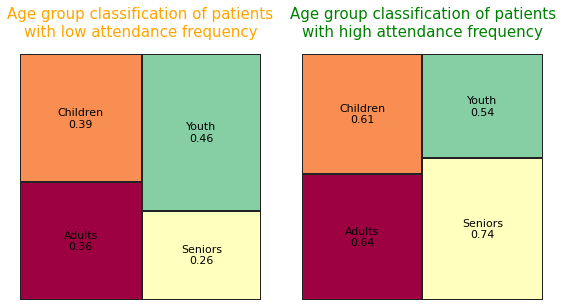

In [24]:
# Plot the results

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
fig.tight_layout()
ax1, ax2 = axes

# setup plot labels, box sizes and colors

labels_low = [i + '\n' + str((round(v,2))) for i, v in out_low.items()]
sizes_low = out_low.values
colors_low = [plt.cm.Spectral(i/float(len(labels_low))) for i in range(len(labels_low))]

labels_hgh = [i + '\n' + str((round(v,2))) for i, v in out_hgh.items()]
sizes_hgh = out_hgh.values
colors_hgh = [plt.cm.Spectral(i/float(len(labels_hgh))) for i in range(len(labels_hgh))]

# Draw Plot
squarify.plot(sizes=sizes_low, label=labels_low, color=colors_low, alpha=1, bar_kwargs=dict(linewidth=2, edgecolor="#222222"), text_kwargs=dict(fontsize=11), ax=ax1);

squarify.plot(sizes=sizes_hgh, label=labels_hgh, color=colors_hgh, alpha=1, bar_kwargs=dict(linewidth=2, edgecolor="#222222"), text_kwargs=dict(fontsize=11), ax=ax2);

# Decorate
ax1.set_title('Age group classification of patients' + '\n' + 'with low attendance frequency', fontsize=15, y=1.05, c='orange')
ax2.set_title('Age group classification of patients' + '\n' + 'with high attendance frequency', fontsize=15, y=1.05, c='green')
ax1.axis('off'); ax2.axis('off');

In [25]:
# Create summary table for patient's gender and medical condition 
# to apply value count on the whole dataframe instead of one variable at a time
# Same concept of splitting population as before

summary_high_show_df = grouped_df[grouped_df.no_show_mean == 0].copy()

summary_low_show_df =  grouped_df[grouped_df.no_show_mean > 0].copy()

summary_high_show_df.drop(columns={'patient_id','appointment_id','scheduling_day','appointment_day',
                                   'age','neighbourhood', 'appointment_count', 'no_show_mean',
                                   'elapsed_days_mean', 'elapsed_days_max', 'elapsed_days_min', 
                                   'elapsed_days_min', 'age_group', 'sms_received_mean'}, inplace = True)

summary_low_show_df.drop(columns={'patient_id','appointment_id','scheduling_day','appointment_day',
                                  'age','neighbourhood', 'appointment_count', 'no_show_mean',
                                  'elapsed_days_mean', 'elapsed_days_max', 'elapsed_days_min', 
                                  'elapsed_days_min', 'age_group', 'sms_received_mean'}, inplace = True)

summary_high_show_df = summary_high_show_df.apply(pd.Series.value_counts)

summary_low_show_df = summary_low_show_df.apply(pd.Series.value_counts)

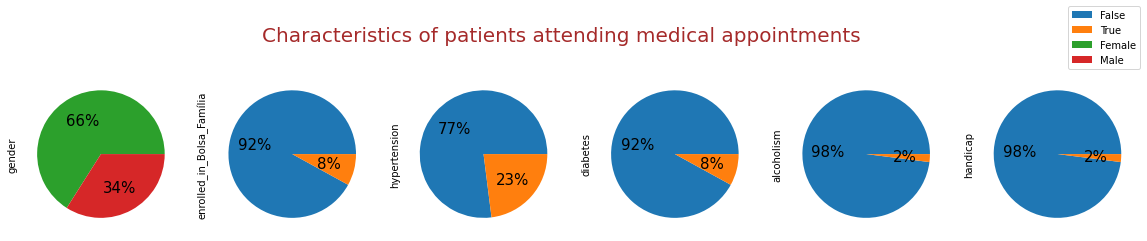

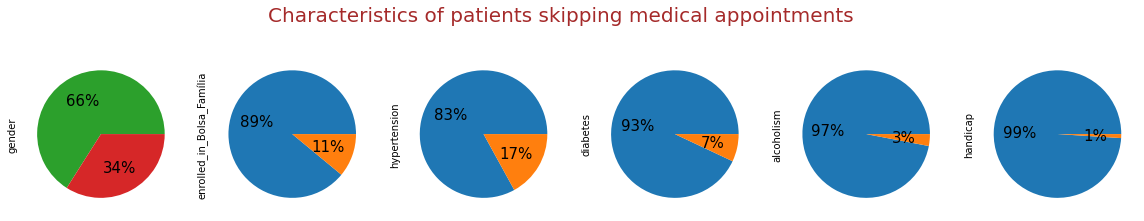

In [26]:
# Calculate relative weight of each condition and plotting

summary_high_show_df.transform(lambda x: round(x / x.sum(),2)).plot(kind='pie', 
                                                                    subplots = True, legend = False, figsize = (20, 10), 
                                                                    fontsize = 15, 
                                                                    autopct = \
                                                                    lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', 
                                                                    labels = None);

plt.gcf().suptitle('Characteristics of patients attending medical appointments', fontsize=20, y=.68, color = 'brown')

plt.legend(["False", "True", 'Female', 'Male'], bbox_to_anchor=(1.05, 1), loc = 4)

summary_low_show_df.transform(lambda x: round(x / x.sum(),2)).plot(kind='pie', 
                                                                   subplots = True, legend = False, figsize = (20, 10),
                                                                   fontsize = 15, 
                                                                   autopct = \
                                                                   lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', 
                                                                   labels = None);

plt.gcf().suptitle("Characteristics of patients skipping medical appointments", fontsize=20, y=.68, color = 'brown');

Seniors takes the lead being highest attendance frequency age group, while youth leads the low attendance one. It makes sense as health deteriorates with age.

The dataset is dominated by female presence; it seems that women are receiving extra medical care than men.

Patients' characteristics do not significantly vary between those who attend or skip their medical appointment. However, enrolment in Bolsa Familia program, hypertension and diabetes medical conditions are the highest among patients who attend; these conditions could be useful in predicting patients' behavior towards their medical appointments.

### Does time has an impact on attendance frequency?

In [27]:
# Resample and inspect

grouped_df[grouped_df.no_show_mean > 0].groupby(['scheduling_day'])['no_show_mean'].count().resample('1m').sum()

scheduling_day
2015-11-30       1
2015-12-31      18
2016-01-31      16
2016-02-29      69
2016-03-31    1146
2016-04-30    7090
2016-05-31    7756
2016-06-30     527
Freq: M, Name: no_show_mean, dtype: int64

In [28]:
grouped_df[grouped_df.no_show_mean > 0].groupby(['appointment_day'])['no_show_mean'].count().resample('1m').sum()

appointment_day
2016-04-30      933
2016-05-31    13454
2016-06-30     2236
Freq: M, Name: no_show_mean, dtype: int64

In [29]:
grouped_df[grouped_df.no_show_mean == 0].groupby(['scheduling_day'])['no_show_mean'].count().resample('1m').sum()

scheduling_day
2015-12-31       36
2016-01-31       31
2016-02-29      143
2016-03-31     1697
2016-04-30    10753
2016-05-31    14890
2016-06-30     1667
Freq: M, Name: no_show_mean, dtype: int64

In [30]:
grouped_df[grouped_df.no_show_mean == 0].groupby(['appointment_day'])['no_show_mean'].count().resample('1m').sum()

appointment_day
2016-04-30     1138
2016-05-31    21963
2016-06-30     6116
Freq: M, Name: no_show_mean, dtype: int64

In [31]:
# Summary of appointments by weekday

master_df_clean['day'] = master_df_clean.appointment_day.dt.day_name()

master_df_clean.groupby('day')['no_show'].count()

day
Friday       12516
Monday       14581
Saturday        31
Thursday     11325
Tuesday      16462
Wednesday    17044
Name: no_show, dtype: int64

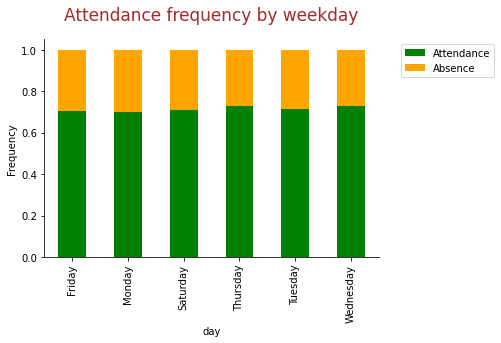

In [32]:
# attendance frequency by weekdays

master_df_clean.groupby('day')['no_show'].value_counts(normalize=True).unstack().plot(
    kind = 'bar', stacked = True, ylabel = 'Frequency', color = ['green', 'orange']);

# Decoration9

plt.title('Attendance frequency by weekday', fontsize = 17, c = 'brown', y = 1.06)

plt.legend(["Attendance", "Absence"], bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.gca().spines["top"].set_alpha(0.0); plt.gca().spines["right"].set_alpha(0.0)

In [33]:
# Check whether decreas in elapsed time between shceduling and actual appointment date impact attendace ferquency
# 16 being average elapsed timed of the dataset

round(grouped_df[(grouped_df.elapsed_days_mean >= 16) & (grouped_df.no_show_mean == 0)].age_group.value_counts(normalize=True),2)

Adults      0.53
Children    0.21
Seniors     0.16
Youth       0.10
Name: age_group, dtype: float64

In [34]:
round(grouped_df[(grouped_df.elapsed_days_mean < 16) & (grouped_df.no_show_mean == 0)].age_group.value_counts(normalize=True),2)

Adults      0.54
Children    0.19
Seniors     0.17
Youth       0.10
Name: age_group, dtype: float64

May appears to be squeezed compared to other months as most appointments were scheduled to take place during this month. It might be because this period follows the heavy festive months where people are busy celebrating according to [this](https://www.lonelyplanet.com/brazil/narratives/planning/month-by-month), but still this can be considered as an improvement opportunity for appointment administration to spread appointments across months.

There is no preference for specific weekday over the other when it comes to attendance frequency, despite that Thursday/Wednesday experienced improved attendance frequency and Friday/Monday are the lowest, it’s not significantly different than rest of weekdays. 

No appointments where scheduled to take place on Sunday which is understandable being a weekend day but given that attendance frequency on Saturday, which is also a weekend day, is comparable to the rest of the weekdays it implies that patients are willing to attend appointments on weekends. This can be also considered as an improvement opportunity for appointment administration to spread appointments across weekdays regardless of weekends. 

On the other hand, decrease in elapsed time between scheduling and actual appointment date does not result in a significant decrease in missed appointments. Which is a bit surprising actually and warrants further investigation of underlying appointment scheduling data. However, Seniors and adults age group shows a slight improvement in attendance frequency with shorter lead times.

### Are there certain neighborhoods experiencing higher attendance frequency than others? Why?

In [35]:
# Check appointment distribution among Neighborhoods

round(master_df_clean.neighbourhood.value_counts(normalize=True) * 100, 2)

JARDIM CAMBURI                 7.24
MARIA ORTIZ                    5.18
RESISTÊNCIA                    3.92
JARDIM DA PENHA                3.69
ITARARÉ                        3.31
                               ... 
PONTAL DE CAMBURI              0.06
ILHA DO BOI                    0.03
ILHA DO FRADE                  0.01
AEROPORTO                      0.01
ILHAS OCEÂNICAS DE TRINDADE    0.00
Name: neighbourhood, Length: 80, dtype: float64

In [36]:
# Create a summary table for attendance frequency per each neighborhood
# to facilitate comparison among each and identify which neighborhood experienced most successful appointments

appointments_by_neighbourhoods = grouped_df.groupby(['neighbourhood'])['appointment_count'].sum()

attendance_by_neighbourhood = grouped_df[grouped_df.no_show_mean == 0]. \
groupby(['neighbourhood'])['appointment_count'].sum()

frequency_of_attendance= attendance_by_neighbourhood / appointments_by_neighbourhoods

frequency_of_attendance = frequency_of_attendance.to_frame().rename(columns={'appointment_count':'frequency_of_attendance'})

appointments_by_neighbourhoods = appointments_by_neighbourhoods.to_frame(). \
rename(columns={'appointment_count':'total_appointments'})

neighbourhoods_summary = pd.merge(frequency_of_attendance, appointments_by_neighbourhoods, 
                                  left_index=True, right_index=True, how='left')

temp_df = master_df_clean.groupby('neighbourhood')[['elapsed_days', 'sms_received']].agg(['mean'])

temp_df.columns = temp_df.columns.droplevel(level=1)

neighbourhoods_summary = pd.merge(neighbourhoods_summary, temp_df, left_index=True, right_index=True, how='left'). \
rename(columns={'elapsed_days':'elapsed_days_mean', 'sms_received':'reminder_frequency'})

neighbourhoods_summary.reset_index(inplace=True)

neighbourhoods_summary.rename(columns={'index':'neighbourhood'}, inplace=True)

neighbourhoods_summary.elapsed_days_mean = neighbourhoods_summary.elapsed_days_mean.astype(int)

neighbourhoods_summary = round(neighbourhoods_summary,2)

In [37]:
# Stats of top 10 neighborhoods with highest attendance frequency

neighbourhoods_summary.sort_values(by='frequency_of_attendance', ascending =False).head(10).describe()

,frequency_of_attendance,total_appointments,elapsed_days_mean,reminder_frequency
count,10.000000,10.000000,10.000000,10.000000
mean,0.691000,478.200000,14.000000,0.467000
std,0.080478,792.254701,5.077182,0.119819
min,0.630000,5.000000,5.000000,0.200000
25%,0.642500,90.000000,11.000000,0.467500
50%,0.655000,201.000000,15.000000,0.525000
75%,0.690000,502.750000,16.000000,0.530000
max,0.870000,2655.000000,22.000000,0.550000


In [38]:
# Stats of top 10 neighborhoods with lowest attendance frequency

neighbourhoods_summary.sort_values(by='frequency_of_attendance').head(10).describe()

,frequency_of_attendance,total_appointments,elapsed_days_mean,reminder_frequency
count,10.000000,10.000000,10.000000,10.000000
mean,0.459000,889.400000,12.400000,0.503000
std,0.033813,662.868715,6.449806,0.098325
min,0.380000,8.000000,6.000000,0.370000
25%,0.442500,265.000000,7.500000,0.460000
50%,0.470000,991.000000,11.000000,0.490000
75%,0.480000,1482.750000,15.000000,0.510000
max,0.490000,1755.000000,27.000000,0.750000


In [39]:
# details of top 10 neighborhoods with highest attendance frequency

neighbourhoods_summary.sort_values(by='frequency_of_attendance', ascending =False).head(10)

,neighbourhood,frequency_of_attendance,total_appointments,elapsed_days_mean,reminder_frequency
31,ILHA DO BOI,0.87,23,5,0.30
0,AEROPORTO,0.80,5,22,0.20
72,SOLON BORGES,0.69,337,16,0.53
47,MORADA DE CAMBURI,0.69,78,8,0.53
79,VILA RUBIM,0.66,598,16,0.53
2,ANTÔNIO HONÓRIO,0.65,180,19,0.52
19,DO QUADRO,0.65,558,15,0.52
39,JARDIM DA PENHA,0.64,2655,14,0.54
16,DE LOURDES,0.63,222,15,0.45
62,SANTA HELENA,0.63,126,10,0.55


In [40]:
# details of top 10 neighborhoods with lowest attendance frequency

neighbourhoods_summary.sort_values(by='frequency_of_attendance').head(10)

,neighbourhood,frequency_of_attendance,total_appointments,elapsed_days_mean,reminder_frequency
32,ILHA DO FRADE,0.38,8,7,0.75
40,JESUS DE NAZARETH,0.44,1755,18,0.45
69,SANTOS DUMONT,0.44,877,16,0.51
33,ILHA DO PRÍNCIPE,0.45,1503,7,0.49
1,ANDORINHAS,0.46,1524,12,0.37
27,GURIGICA,0.48,1105,10,0.46
60,SANTA CECÍLIA,0.48,349,27,0.51
11,COMDUSA,0.48,237,6,0.46
59,ROMÃO,0.49,1422,12,0.54
28,HORTO,0.49,114,9,0.49


In [41]:
# will compare age and gender composition among top 2 neighborhood of each highest and lowest groups as 
# other variables are approximatly similar and will be further investigated in appointment adminstration analysis section 

print('ILHA DO BOI gender and age composition :', '\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'ILHA DO BOI'].gender.value_counts(normalize=True),2),'\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'ILHA DO BOI'].age_group.value_counts(normalize=True),2),'\n','\n',
      '-'* 20,'\n','\n',
      'AEROPORTO gender and age composition :', '\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'AEROPORTO'].gender.value_counts(normalize=True),2),'\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'AEROPORTO'].age_group.value_counts(normalize=True),2)
     )

ILHA DO BOI gender and age composition : 
 
 F    0.61
M    0.39
Name: gender, dtype: float64 
 
 Adults     0.61
Seniors    0.22
Youth      0.17
Name: age_group, dtype: float64 
 
 -------------------- 
 
 AEROPORTO gender and age composition : 
 
 F    0.75
M    0.25
Name: gender, dtype: float64 
 
 Adults    1.0
Name: age_group, dtype: float64


In [42]:
print('ILHA DO FRADE gender and age composition :', '\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'ILHA DO FRADE'].gender.value_counts(normalize=True),2),'\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'ILHA DO FRADE'].age_group.value_counts(normalize=True),2),'\n','\n',
      '-'* 20,'\n','\n',
      'JESUS DE NAZARETH gender and age composition :', '\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'JESUS DE NAZARETH'].gender.value_counts(normalize=True),2),'\n','\n',
      round(grouped_df[grouped_df.neighbourhood == 'JESUS DE NAZARETH'].age_group.value_counts(normalize=True),2)
     )

ILHA DO FRADE gender and age composition : 
 
 M    1.0
Name: gender, dtype: float64 
 
 Adults    1.0
Name: age_group, dtype: float64 
 
 -------------------- 
 
 JESUS DE NAZARETH gender and age composition : 
 
 F    0.64
M    0.36
Name: gender, dtype: float64 
 
 Adults      0.43
Children    0.34
Youth       0.17
Seniors     0.07
Name: age_group, dtype: float64


In [43]:
# Check if a neighborhood didn’t have any successful appointment

neighbourhoods_summary[neighbourhoods_summary.frequency_of_attendance.isnull()]

,neighbourhood,frequency_of_attendance,total_appointments,elapsed_days_mean,reminder_frequency
34,ILHAS OCEÂNICAS DE TRINDADE,NaN,2,28,0.0


In [44]:
# Check details of this neighborhood

master_df_clean[master_df_clean.neighbourhood == 'ILHAS OCEÂNICAS DE TRINDADE']

,patient_id,appointment_id,gender,scheduling_day,appointment_day,age,neighbourhood,enrolled_in_Bolsa_Família,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,elapsed_days,day
33207,534986855114.0,5583947,F,2016-04-14 12:25:43,2016-05-13,51.0,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,28,Friday
33216,7256429752481.0,5583948,F,2016-04-14 12:26:13,2016-05-13,58.0,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,28,Friday


Comparing summary statistics of top 10 neighborhoods having highest and lowest attendance frequency indicates that neither shorter elapsed time nor higher frequent reminders have a significant impact on attendance frequency. Actually, reminder frequency is slightly higher for neighborhoods with lower attendance frequency!

Average attendance frequency and elapsed days between scheduling and appointment dates for each of the top 10 highest and lowest neighborhoods category are 70% and 46%, 14 and 12 respectively. I selected top 4 neighborhoods 2 from each category (highest/lowest) and examined their demographic composition, the following was noted:

- Neighborhoods having more appoints for male patients experienced less attendance frequency.
- Demographic composition of less senior patients had less attendance frequency.

This confirms my earlier conclusion that Female and older patients are common characteristics among patients having high attendance frequency. Well, females dominate the dataset so it’s not a surprise!

However, ILHAS OCEÂNICAS DE TRINDADE neighborhood did not experience any successful appointments contrary to my expectation given the composition of gender and age group. Maybe because elapsed time was 28 days and no frequent reminders were sent to patients.

This will be further investigated in appointment administration section.

It warrants additional data to conclude why exactly some Neighborhoods experience higher attendance frequency than others (nature of visits i.e. is it for severe illness 'cancer for example' or just customary, distance between patient and appoint location, commute times, venue, etc...)


### Is appointment scheduling administered properly?

In [45]:
# inspect patients with multiple appointments as it will give better overview on scheduling practices

grouped_df[grouped_df.appointment_count > 1].sort_values(by='appointment_count', ascending=False).head(10)

,patient_id,appointment_id,gender,scheduling_day,appointment_day,age,neighbourhood,enrolled_in_Bolsa_Família,hypertension,diabetes,alcoholism,handicap,appointment_count,no_show_mean,elapsed_days_mean,elapsed_days_max,elapsed_days_min,sms_received_mean,age_group
2203,1484143378533.0,5573128,F,2016-04-12 11:56:51,2016-04-29,56.0,GRANDE VITÓRIA,0,1,0,0,0,30,0.233333,5.633333,16,1,0.533333,Adults
3868,17798942295934.0,5625177,F,2016-04-27 07:00:57,2016-04-29,39.0,ILHA DO PRÍNCIPE,0,0,0,0,0,20,0.200000,2.650000,11,1,0.350000,Adults
14722,38899547972932.0,5628704,F,2016-04-27 11:27:57,2016-04-29,67.0,SÃO BENEDITO,0,1,1,0,0,20,0.150000,2.700000,18,0,0.400000,Seniors
10908,32351482915.0,5625136,F,2016-04-27 06:55:18,2016-04-29,64.0,JUCUTUQUARA,0,0,0,0,0,20,0.050000,4.450000,57,0,0.250000,Adults
24516,579448128831.0,5628609,F,2016-04-27 11:18:29,2016-04-29,54.0,MARIA ORTIZ,0,0,0,0,0,19,0.105263,3.736842,29,1,0.368421,Adults
14176,37994336685892.0,5648407,F,2016-05-02 15:38:53,2016-05-04,61.0,SÃO PEDRO,0,1,1,0,0,19,0.157895,2.736842,18,0,0.210526,Adults
26646,6285945381692.0,5520867,M,2016-03-29 10:38:36,2016-05-10,66.0,CRUZAMENTO,0,0,0,0,0,19,0.052632,18.052632,55,2,0.684211,Seniors
34869,787697428886813.0,5612197,F,2016-04-25 08:01:39,2016-05-02,37.0,JOANA D´ARC,0,0,0,0,0,18,0.222222,14.388889,33,4,0.166667,Adults
36962,834798139251.0,5628613,M,2016-04-27 11:19:09,2016-04-29,49.0,DO CABRAL,0,1,0,0,0,17,0.176471,4.294118,35,1,0.411765,Adults
38605,863266615443557.0,5625162,F,2016-04-27 06:58:47,2016-04-29,52.0,SANTO ANDRÉ,0,0,0,0,0,17,0.000000,2.058824,5,1,0.294118,Adults


In [46]:
# inspect records of patients with highest appointments count

master_df_clean[(master_df_clean.patient_id == '1484143378533.0')].sort_values(by='scheduling_day') \
.drop(columns={'enrolled_in_Bolsa_Família', 'hypertension', 'diabetes', 'alcoholism', 'handicap'})

,patient_id,appointment_id,gender,scheduling_day,appointment_day,age,neighbourhood,sms_received,no_show,elapsed_days,day
1576,1484143378533.0,5573128,F,2016-04-12 11:56:51,2016-04-29,56.0,GRANDE VITÓRIA,1,0,16,Friday
14698,1484143378533.0,5624634,F,2016-04-26 16:36:37,2016-05-02,56.0,GRANDE VITÓRIA,1,1,5,Monday
14754,1484143378533.0,5624644,F,2016-04-26 16:38:19,2016-05-03,56.0,GRANDE VITÓRIA,0,0,6,Tuesday
14812,1484143378533.0,5624663,F,2016-04-26 16:40:50,2016-05-04,56.0,GRANDE VITÓRIA,1,0,7,Wednesday
14748,1484143378533.0,5624674,F,2016-04-26 16:41:54,2016-05-05,56.0,GRANDE VITÓRIA,1,0,8,Thursday
14779,1484143378533.0,5624726,F,2016-04-26 16:48:57,2016-05-06,56.0,GRANDE VITÓRIA,1,1,9,Friday
9252,1484143378533.0,5640785,F,2016-04-29 11:24:43,2016-05-03,56.0,GRANDE VITÓRIA,1,0,3,Tuesday
14699,1484143378533.0,5649276,F,2016-05-02 18:56:40,2016-05-09,56.0,GRANDE VITÓRIA,0,0,6,Monday
14755,1484143378533.0,5649283,F,2016-05-02 18:57:31,2016-05-10,56.0,GRANDE VITÓRIA,0,0,7,Tuesday
14813,1484143378533.0,5649297,F,2016-05-02 18:59:07,2016-05-11,56.0,GRANDE VITÓRIA,1,0,8,Wednesday


In [47]:
master_df_clean[(master_df_clean.patient_id == '17798942295934.0')].sort_values(by='appointment_day') \
.drop(columns={'enrolled_in_Bolsa_Família', 'hypertension', 'diabetes', 'alcoholism', 'handicap'})

,patient_id,appointment_id,gender,scheduling_day,appointment_day,age,neighbourhood,sms_received,no_show,elapsed_days,day
1584,17798942295934.0,5625177,F,2016-04-27 07:00:57,2016-04-29,39.0,ILHA DO PRÍNCIPE,0,0,1,Friday
32515,17798942295934.0,5631287,F,2016-04-28 06:42:04,2016-05-02,39.0,ILHA DO PRÍNCIPE,1,0,3,Monday
32551,17798942295934.0,5642997,F,2016-05-02 06:56:06,2016-05-04,39.0,ILHA DO PRÍNCIPE,0,0,1,Wednesday
14715,17798942295934.0,5655974,F,2016-05-04 07:27:04,2016-05-06,39.0,ILHA DO PRÍNCIPE,0,0,1,Friday
32516,17798942295934.0,5660849,F,2016-05-05 06:53:21,2016-05-09,39.0,ILHA DO PRÍNCIPE,0,0,3,Monday
32552,17798942295934.0,5671676,F,2016-05-09 07:00:47,2016-05-11,39.0,ILHA DO PRÍNCIPE,0,0,1,Wednesday
38008,17798942295934.0,5658248,F,2016-05-04 10:46:13,2016-05-12,39.0,ILHA DO PRÍNCIPE,1,0,7,Thursday
14716,17798942295934.0,5682828,F,2016-05-11 06:37:06,2016-05-13,39.0,ILHA DO PRÍNCIPE,0,0,1,Friday
32517,17798942295934.0,5688086,F,2016-05-12 06:37:10,2016-05-16,39.0,ILHA DO PRÍNCIPE,0,0,3,Monday
32553,17798942295934.0,5697937,F,2016-05-16 07:04:55,2016-05-18,39.0,ILHA DO PRÍNCIPE,0,0,1,Wednesday


In [48]:
# Calculate attendace frequency of patients having multiple appointments in the same day

temp_df = master_df_clean[master_df_clean.patient_id.duplicated(keep=False)].sort_values(by='patient_id')

temp_df['gap'] = temp_df['appointment_day'].shift(-1) - temp_df['appointment_day']

temp_df['gap'] = temp_df['gap'].dt.days

temp_df_fltrd = temp_df[(temp_df.no_show == 1) & (temp_df.gap == 0)]

round(temp_df_fltrd.shape[0] / temp_df[temp_df.no_show == 1].shape[0],2)

0.08

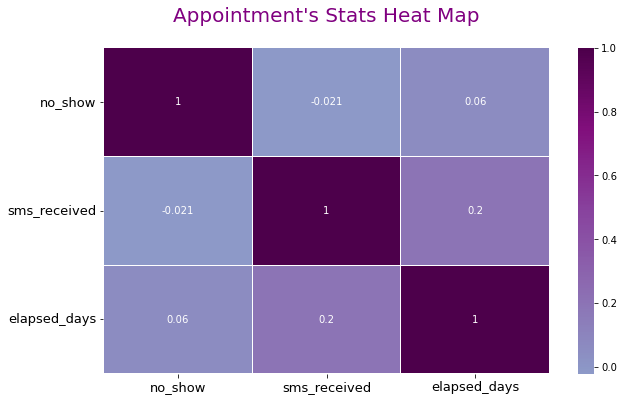

In [49]:
# Heatmap for appointment stats

appointment_stats = master_df_clean.groupby(['appointment_id'])[['no_show', 'sms_received', 'elapsed_days']].mean()

# Plot

plt.figure(figsize=(10,6))

sns.heatmap(appointment_stats.corr(), xticklabels = appointment_stats.corr().columns, 
            yticklabels = appointment_stats.corr().columns, cmap = 'BuPu', center = 0, annot = True, linewidths = .01)

# Decorations

plt.title('Appointment\'s Stats Heat Map', fontsize = 20, color = 'purple' , y = 1.06)

plt.xticks(fontsize = 13)

plt.yticks(rotation = 0, fontsize = 13, va = "center");

I'll comment on appointment administration activities then will discuss my concerns on the dataset itself

##### Analysis of appointment administration activities

8% of missed appointments were scheduled in the same day, this is noted for patients having multiple appointments. Another development opportunity for appointment administration is to steer away from scheduling multiple appointments in the same day; unless there is a need to.

Friday is a common day for missed appointments as noted from the detailed records inspected above and those of ILHAS OCEÂNICAS DE TRINDADE neighborhood. This is also confirmed by earlier analysis of attendance by weekday as Friday was one of the lowest.

Frequent reminders are associated with the length of elapsed days as noted from +ve correlation between sms received and elapsed time. However, correlation coefficient is closer to zero suggesting nonlinear relationship which can be observed in the appointment records of the patients above. Take patient # 1484143378533 as an example, we can observe that reminders are not sent systematically for similar elapsed time period same as for patient # 17798942295934 but with less frequency. Switch sorting of each table to reproduce these observation. 

This can be an area for improvement in appointment administration by following a systematic approach in sending reminders to patients and/or increasing the frequency or methods of reminders. However, given that a weak -ve correlation that is almost nonlinear between the frequency of reminders and attendance; associated costs of increasing or changing reminder methods need to be closely examined. 

Weak +ve correlation that is almost nonlinear between elapsed time and attendance frequency need to be investigated further, as a strong +ve linear relationship is expected unless there are limited sources of medical services providers; this correlation confirms my earlier analysis of attendance frequency above and below 15 days lead time threshold.


##### concerns on data integrity

Actually, appointment administration and related data needs a lot further investigation than any other independent variable in this dataset to confirm data integrity, as several red flags were noted as follows:

1. Insignificant impact of shorter appointment lead times on attendance frequency
2. Time stamps and appointment ID discrepancies, discussed further below.

Upon inspecting the appointment record of the 2 patients above, having around 80% attendance frequency and a total of 50 appointments, I noticed that:

1. Several appointments were scheduled in the same day within a very short time, sometimes less than a minute!

2. Appointment ID sequence gap is significant compared to the short scheduling time.

To elaborate more, let’s take the record of patient # 1484143378533 as an example. We can see that there are 5 appointments scheduled on the 2nd of May’16 with the following time stamps sorted in an ascending order ‘18:56:40’, ‘18:57:31, ‘18:59:07’, ‘19:00:08’,’ 19:01:32’. Each appoint has a unique ID as follows ‘5649276’, ‘5649283’,’ 5649297’,’ 5649306,’ 5649316’. Such data sparks a lot of concerns:

- How is it possible to have such quick calls/registrations?

- How come gaps in appointment ID are significant within such short time span? Are all Neighborhoods linked to the same registration system?

- What’s the point of having such pattern of registration, does they all relate to each other? Should some of them be cancelled?

- Is No show record for these particular appointments correct?

- IF it’s not a registration problem/error rather a data gathering one, does this affect the accuracy of other independent variables?

Unfortunately, answers to these questions can’t be extracted from the current dataset. But I’m Curious!

<a id='conclusions'></a>

## Conclusion

1. Females and Senior age group have higher attendance frequency than others
	
2. Youth age group most likely will skip their medical appointments
	
3. Enrolment in Bolsa Familia program, hypertension and diabetes medical conditions are common characteristics of patients with higher attendance frequency
	
4. Seniors and adults age group shows a slight improvement in attendance frequency with shorter lead times.

5. No preference for specific weekday over the other when it comes to attendance frequency.


## Appointment administration improvement opportunities 

1. Spread appointments across months and weekdays regardless of weekends.

2. Avoid scheduling multiple appointments in the same day for a single patient. Unless there is a need to.

3. Follow a systematic approach when sending reminders to patients and consider increasing the frequency and/or methods of reminders while closely monitoring the associated costs of doing so.
	

## Limitations
	
- How was the appointment scheduled is not clear.
	
- Sufficient details about appointments are not provided (Type, employee ID, physician, venue, etc…).
	
- Medical history of children has some unusual entries like alcoholism. I did not disregard this.
	
- Count and timing of sms reminders are not provided
	
- I assumed age of 0 relates to newborns and not data entry error

- Appointment administration and related data anomalies can lead to different interpretations if proved to be valid, actually it casts doubts on the integrity of the whole dataset.